In [103]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [104]:
df = pd.read_csv("chennai_house_price_prediction.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [105]:
df.shape

(7109, 19)

In [106]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [107]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [108]:
df.duplicated().sum()

0

# Missing Values

### N_BEDROOM

In [109]:
df["N_BEDROOM"].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [110]:
df["N_BEDROOM"].fillna(value=df["N_BEDROOM"].mode()[0],inplace=True)
df["N_BEDROOM"].isnull().sum()

0

### N_BATHROOM

In [111]:
df["N_BATHROOM"].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

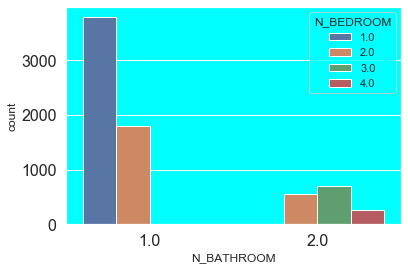

In [112]:
sns.countplot(x = df["N_BATHROOM"], hue =df["N_BEDROOM"])

In [113]:
for i in range(len(df)):
    if pd.isnull(df["N_BATHROOM"][i])==True:
        if df["N_BEDROOM"][i]<=2.0:
            df.loc[i,"N_BATHROOM"]=1
        else:
            df.loc[i,"N_BATHROOM"]=2
            
df["N_BATHROOM"].isnull().sum()

0

### QS_OVERALL

In [114]:
df["QS_OVERALL"].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
4.075     1
4.930     1
2.585     1
2.445     1
2.545     1
Name: QS_OVERALL, Length: 479, dtype: int64

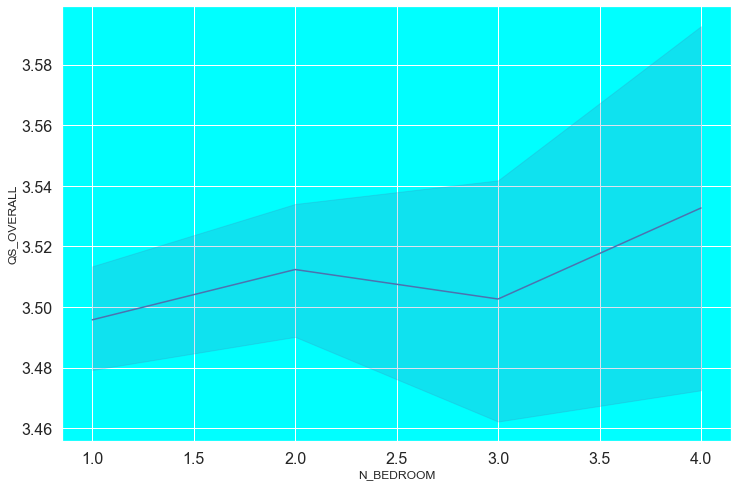

In [115]:
plt.figure(figsize=(12,8))
sns.set(rc = {'axes.facecolor': 'cyan', 'axes.grid': True, 'xtick.labelsize':16, 'ytick.labelsize':16})
sns.lineplot(x = df["N_BEDROOM"], y = df["QS_OVERALL"])

In [116]:
for i in range(len(df)):
    if pd.isnull(df["QS_OVERALL"][i])==True:
        df.loc[i,"QS_OVERALL"]=(df.loc[i,"QS_BEDROOM"]+df.loc[i,"QS_BATHROOM"]+df.loc[i,"QS_ROOMS"])/3

df["QS_OVERALL"].isnull().sum()

0

# Data Preprocessing

### AREA

In [117]:
df["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [118]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)
df["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

### SALE_COND

In [119]:
df["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [120]:
df["SALE_COND"].replace({"AdjLand":"Adj Land","Partiall":"Partial","PartiaLl":"Partial","AbNormal":"Ab Normal"},inplace=True)
df["SALE_COND"].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

### BUILDTYPE

In [121]:
df["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [122]:
df["BUILDTYPE"].replace({"Comercial":"Commercial","Others":"Other"},inplace=True)
df["BUILDTYPE"].value_counts()

House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

### PARK_FACIL

In [123]:
df["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [124]:
df["PARK_FACIL"].replace({"Noo":"No"},inplace=True)
df["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

### UTILITY_AVAIL

In [125]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [126]:
df["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSewr":"NoSeWa"},inplace=True)
df["UTILITY_AVAIL"].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

### STREET

In [127]:
df["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [128]:
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)
df["STREET"].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

### AREA

In [129]:
df.pivot_table(values="SALES_PRICE",index="AREA",aggfunc="median")

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


### MZZONE

In [130]:
df.pivot_table(values="SALES_PRICE",index="MZZONE",aggfunc="median")

,SALES_PRICE
MZZONE,
A,6928000
C,7721190
I,8312670
RH,10505240
RL,11184020
RM,11839510


### COMMISION

Text(0, 0.5, 'Sales Price')

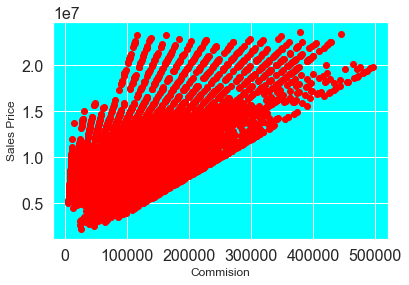

In [131]:
plt.scatter(df["COMMIS"],df["SALES_PRICE"],color="red")
plt.xlabel("Commision")
plt.ylabel("Sales Price")

### DIST_MAINROAD

Text(0, 0.5, 'Sales Price')

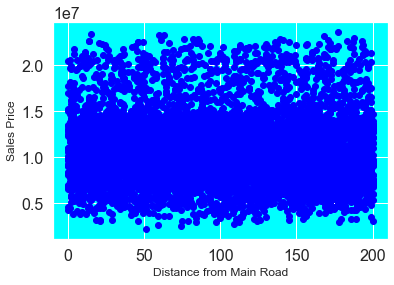

In [132]:
plt.scatter(df["DIST_MAINROAD"],df["SALES_PRICE"],color="blue")
plt.xlabel("Distance from Main Road")
plt.ylabel("Sales Price")

### HEATMAP

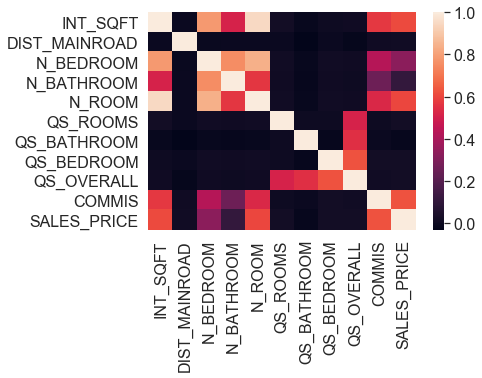

In [133]:
sns.heatmap(df.corr())